In [1]:
import os
import pandas as pd
import numpy as np
import json
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
cards = pd.read_csv("../data/cards_data.csv")
users = pd.read_csv("../data/users_data.csv")
transactions = pd.read_csv("../data/transactions_data.csv")

In [3]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [4]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1


In [5]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN


In [6]:
def money_to_float(s):
    s = pd.Series(s).astype(str).str.strip()
    s = s.str.replace(r'[$,]', '', regex=True)   
    return pd.to_numeric(s)   

def parse_mmYYYY(s):
    return pd.to_datetime(pd.Series(s).astype(str), format="%m/%Y")

In [7]:
# users: 화폐형 컬럼 숫자화, 불필요(PII) 최소 제거
for c in ["per_capita_income","yearly_income","total_debt"]:
    if c in users.columns:
        users[c] = money_to_float(users[c])
        
users = users.drop("address", axis=1) 

# 카드 숫자/날짜 변환
cards["credit_limit"] = money_to_float(cards["credit_limit"])
cards["acct_open_date"] = parse_mmYYYY(cards["acct_open_date"])
cards["expires"] = parse_mmYYYY(cards["expires"]) # datime 형태로 변환

# 카드 has_chaip, card_on_dark_web 정보 이진화
for c in ["has_chip","card_on_dark_web"]:
    cards[c] = cards[c].map({"YES":1,"Yes":1,"NO":0,"No":0}).astype('Int8')

# 카드 민감정보 제거
cards = cards.drop(["card_number", "cvv"], axis=1)

# transactions: 날짜/금액/파생
transactions["date"] = pd.to_datetime(transactions["date"])
transactions["hour"] = transactions["date"].dt.hour
transactions["dow"]  = transactions["date"].dt.dayofweek

# 음수(환불 등)는 분석 목적에 따라 분리
transactions["amount"] = money_to_float(transactions["amount"])
transactions["amount_pos"] = transactions["amount"].clip(lower=0)
transactions["amount_log1p"] = np.log1p(transactions["amount_pos"])

transactions["is_refund"] = (transactions["amount"] < 0).astype('Int8')
transactions["amount_pos"] = transactions["amount"].clip(lower=0)
transactions["amount_neg"] = transactions["amount"].clip(upper=0) 

# 우편번호 float → 문자열 5자리
transactions["zip"] = transactions["zip"].round().astype('Int64')
transactions["zip_str"] = transactions["zip"].astype("string").str.zfill(5)

# 거의 전부 NaN인 errors 컬럼 제거
transactions = transactions.drop("errors", axis=1) 

In [8]:
work = pd.merge(transactions, users, left_on='client_id', right_on='id', how='left', suffixes=('', '__USER'))
work = pd.merge(work, cards, left_on='card_id', right_on='id', how='left', suffixes=('', '__CARD'))

In [15]:
work.drop(columns=['id__USER', 'id__CARD', 'client_id__CARD'], inplace=True, errors='ignore') # 중복 ID 컬럼 삭제

In [16]:
# 1. JSON 파일 불러오기
fraud_label_file_path = '../data/train_fraud_labels.json'

with open(fraud_label_file_path, 'r') as f:
    data = json.load(f)

# 2. target 딕셔너리 추출
target_dict = data['target']

In [17]:
# 'is_raud'에 target 값들 입력
work['is_fraud'] = work['id'].astype(str).map(target_dict)
work['is_fraud'] = work['is_fraud'].map({'No': 0, 'Yes': 1}).astype('Int8') # Yes를 1로 No를 0으로

# fraud_label null일 경우 0으로.
work_with_target = work.fillna(0)

In [18]:
work_with_target.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'hour',
       'dow', 'amount_pos', 'amount_log1p', 'is_refund', 'amount_neg',
       'zip_str', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'card_brand',
       'card_type', 'expires', 'has_chip', 'num_cards_issued', 'credit_limit',
       'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web',
       'is_fraud'],
      dtype='object')

In [19]:
##################################################
filepath = '../data/transactions_wtih_target.csv' # ********* 이부분은 본인이 저장하고 싶은 경로 + 파일명 사용!! *******
#################################################


if not os.path.exists(filepath):   # 파일 없을 때만 저장
    work_with_target.to_csv(filepath, index=False)
else:
    print(f'⚠️ 파일 이미 존재: {filepath}, 저장 스킵')

## EDA - amount가 음수인 사기거래 

In [20]:
# 사기거래의 경우 환불이 된 경우가 있을 수 있다. 금액이 음수인 경우를 추적해보자
work_with_target[(work_with_target.amount_neg !=0) & (work_with_target.is_fraud != 0)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
22642,7502469,2010-01-07 19:26:00,126,5497,-339.0,Online Transaction,3558,ONLINE,0,0,...,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,0,1
41604,7525132,2010-01-13 15:43:00,1600,5050,-104.0,Online Transaction,39991,ONLINE,0,0,...,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,0,1
74531,7564371,2010-01-23 21:33:00,1048,2542,-437.0,Online Transaction,59474,ONLINE,0,0,...,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,0,1
96147,7590192,2010-01-30 12:44:00,1019,5112,-450.0,Online Transaction,59474,ONLINE,0,0,...,Mastercard,Credit,2023-11-01,1,1,7300,2008-10-01,2010,0,1
108042,7604364,2010-02-03 00:01:00,771,4986,-138.0,Online Transaction,74934,ONLINE,0,0,...,Mastercard,Debit,2023-01-01,1,2,17536,2003-10-01,2010,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13080437,23483325,2019-09-02 14:55:00,74,4027,-301.0,Chip Transaction,59474,Rome,Italy,0,...,Visa,Debit,2022-06-01,1,1,19746,2014-07-01,2014,0,1
13098338,23505312,2019-09-07 11:06:00,1,4652,-367.0,Swipe Transaction,7777,Rome,Italy,0,...,Visa,Credit,2021-12-01,0,1,12800,2007-09-01,2011,0,1
13178843,23604739,2019-09-28 12:25:00,944,372,-69.0,Chip Transaction,61195,Rome,Italy,0,...,Mastercard,Debit,2020-05-01,1,2,72274,2018-01-01,2018,0,1
13281619,23731814,2019-10-25 13:41:00,1843,5834,-382.0,Chip Transaction,32070,Rome,Italy,0,...,Mastercard,Credit,2021-10-01,1,2,4800,2005-12-01,2009,0,1


In [21]:
work_with_target[(work_with_target.client_id == 126) & (abs(work_with_target.amount) == 339)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
9526,7486725,2010-01-03 20:58:00,126,5497,339.0,Online Transaction,3558,ONLINE,0,0,...,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,0,1
22642,7502469,2010-01-07 19:26:00,126,5497,-339.0,Online Transaction,3558,ONLINE,0,0,...,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,0,1


In [22]:
work_with_target[(work_with_target.client_id == 1600) & (abs(work_with_target.amount) == 104)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
32204,7513871,2010-01-10 19:44:00,1600,5050,104.0,Online Transaction,39991,ONLINE,0,0,...,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,0,1
41604,7525132,2010-01-13 15:43:00,1600,5050,-104.0,Online Transaction,39991,ONLINE,0,0,...,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,0,1
2127995,10045432,2011-09-09 17:53:00,1600,4251,104.0,Swipe Transaction,59474,Belfair,WA,98528,...,Mastercard,Debit,2023-08-01,1,1,48754,2008-08-01,2013,0,0
2134935,10053867,2011-09-11 19:48:00,1600,4251,-104.0,Swipe Transaction,59474,Belfair,WA,98528,...,Mastercard,Debit,2023-08-01,1,1,48754,2008-08-01,2013,0,0


In [23]:
work_with_target[(work_with_target.client_id == 1048) & (abs(work_with_target.amount) == 437)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
71664,7560966,2010-01-22 23:31:00,1048,2542,437.0,Online Transaction,59474,ONLINE,0,0,...,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,0,1
74531,7564371,2010-01-23 21:33:00,1048,2542,-437.0,Online Transaction,59474,ONLINE,0,0,...,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,0,1


In [24]:
work_with_target[(work_with_target.client_id == 345) & (abs(work_with_target.amount) == 210)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
13282707,23733174,2019-10-25 18:53:00,345,3441,210.0,Chip Transaction,49637,Rome,Italy,0,...,Visa,Credit,2024-09-01,1,3,7900,2009-06-01,2009,0,1
13289605,23741689,2019-10-27 14:49:00,345,3441,-210.0,Chip Transaction,49637,Rome,Italy,0,...,Visa,Credit,2024-09-01,1,3,7900,2009-06-01,2009,0,1


- 사기 거래 금액이 음수인 경우는 환불된 경우
- 사기거래 count 집계시 중복 집계(사기 거래 피해 + 사기거래 환불로)
- 사기거래 집계에 사용할 거래내역은 금액이 양수인 경우만으로 한정해야한다.

In [25]:
# work_with_target 데이터에서 amount가 음수면서 is_faud는 1인 경우 제외
condition = ~((work_with_target.amount_neg != 0) & (work_with_target.is_fraud != 0))
work_with_target_pos = work_with_target[condition]

# 고객 id별 fraud_count (양수 금액 + 사기)
fraud_counts_pos = (
    work_with_target_pos.groupby('client_id')['is_fraud']
    .sum()  # 고객별 사기 피해 건수
    .reset_index(name='fraud_count')
)

In [26]:
# amount < 0 인 일반 거래는 여전히 dataframe에 남아있음.
work_with_target_pos[work_with_target_pos.amount < 0]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
0,7475327,2010-01-01 00:01:00,1556,2972,-77.0,Swipe Transaction,59935,Beulah,ND,58523,...,Mastercard,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0,0
19,7475347,2010-01-01 00:36:00,114,3398,-64.0,Swipe Transaction,61195,North Hollywood,CA,91606,...,Mastercard,Debit,2023-07-01,1,2,27447,2008-06-01,2010,0,0
50,7475382,2010-01-01 01:25:00,1703,2969,-78.0,Swipe Transaction,43293,Grand Junction,CO,81506,...,Mastercard,Credit,2022-06-01,1,2,10600,2008-05-01,2019,0,0
81,7475422,2010-01-01 02:13:00,1453,1117,-460.0,Swipe Transaction,5009,Middletown,NY,10940,...,Mastercard,Debit,2024-11-01,1,1,14561,2007-02-01,2015,0,0
114,7475460,2010-01-01 03:08:00,957,4532,-147.0,Swipe Transaction,44795,Marysville,OH,43040,...,Mastercard,Debit,2020-06-01,0,1,27974,2003-09-01,2012,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305780,23761706,2019-10-31 22:13:00,1360,143,-91.0,Chip Transaction,59935,Crestview,FL,32536,...,Visa,Credit,2020-08-01,1,1,9000,2007-01-01,2007,0,0
13305811,23761745,2019-10-31 22:28:00,194,5587,-71.0,Swipe Transaction,59935,Hartford City,IN,47348,...,Visa,Debit,2023-03-01,0,2,9080,2009-11-01,2013,0,0
13305813,23761747,2019-10-31 22:29:00,133,4683,-52.0,Chip Transaction,61195,Marietta,GA,30067,...,Mastercard,Debit,2024-03-01,1,1,25197,2008-09-01,2011,0,0
13305820,23761757,2019-10-31 22:35:00,260,323,-77.0,Chip Transaction,22204,Mission,TX,78572,...,Visa,Debit,2021-12-01,1,1,13342,2013-01-01,2013,0,0


In [27]:
# 고객 id별 fraud_count (양수 금액 + 음수 금액 + 사기)
fraud_counts_all = (
    work_with_target.groupby('client_id')['is_fraud'] # work_with_target은 음수의 사기거래 금액도 포함
    .sum()  # 고객별 사기 피해 건수
    .reset_index(name='fraud_count')
)

In [28]:
users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,183855,675,1


In [29]:
# 양수 사기 금액만 포함한 경우
users_with_fraud_count_pos = pd.merge(users, fraud_counts_pos, left_on='id', right_on='client_id', how='left')
users_with_fraud_count_pos.drop(columns='client_id', inplace=True, errors=True)

In [30]:
# 음수 사기 금액도 포함한 경우
users_with_fraud_count = pd.merge(users, fraud_counts_all, left_on='id', right_on='client_id', how='left')
users_with_fraud_count.drop(columns='client_id', inplace=True, errors=True)

In [31]:
# users 데이터에 fraud_count 추가 완료 확인
users_with_fraud_count_pos.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_count
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,127613,787,5,9
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,191349,701,5,21
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,196,698,5,30
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,202328,722,4,8
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,183855,675,1,0


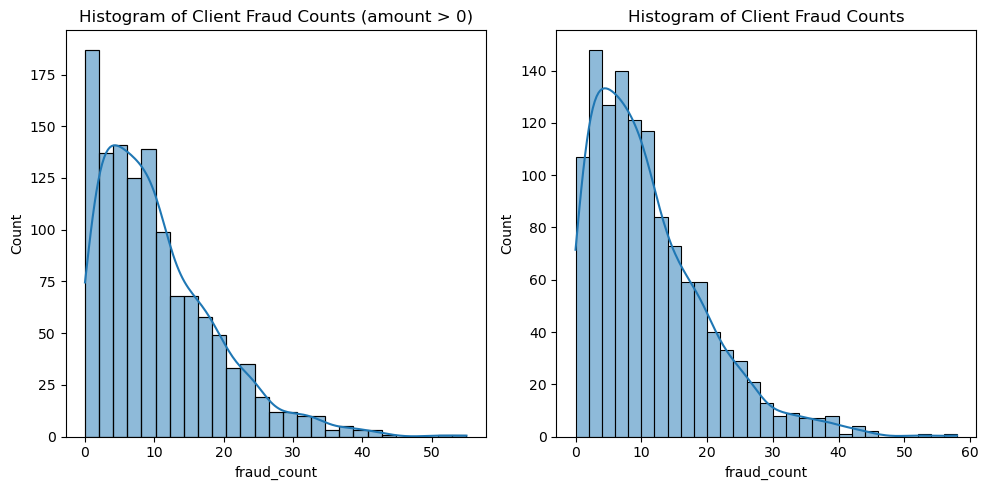

In [32]:
plt.figure(figsize=(10, 5)) 

# amount 양수만
plt.subplot(121)  # 1행 2열 중 1번째
sns.histplot(users_with_fraud_count_pos.fraud_count, kde=True)
plt.title('Histogram of Client Fraud Counts (amount > 0)')

# amount 음수도 포함
plt.subplot(122)  # 1행 2열 중 2번째
sns.histplot(users_with_fraud_count.fraud_count, kde=True)
plt.title('Histogram of Client Fraud Counts')

plt.tight_layout()
plt.show()

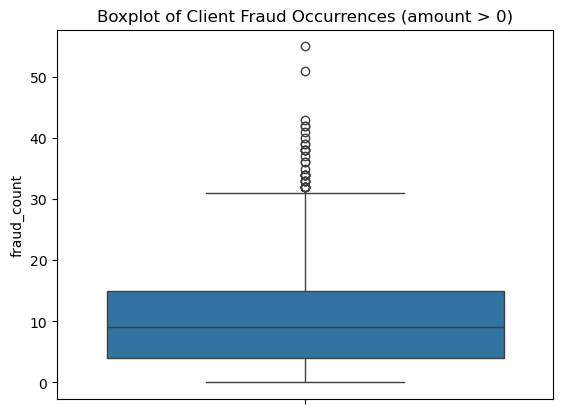

In [33]:
sns.boxplot(users_with_fraud_count_pos.fraud_count)
plt.title('Boxplot of Client Fraud Occurrences (amount > 0)')
plt.show()

In [34]:
users_with_fraud_count.fraud_count.describe()

count       1219.0
mean     10.936833
std       8.698571
min            0.0
25%            4.0
50%            9.0
75%           15.0
max           58.0
Name: fraud_count, dtype: Float64

In [35]:
users_with_fraud_count_pos.isna().sum()

id                     0
current_age            0
retirement_age         0
birth_year             0
birth_month            0
gender                 0
latitude               0
longitude              0
per_capita_income      0
yearly_income          0
total_debt             0
credit_score           0
num_credit_cards       0
fraud_count          781
dtype: int64

In [36]:
len(users_with_fraud_count_pos) - users_with_fraud_count_pos.fraud_count.isna().sum()

np.int64(1219)

In [37]:
# 각 사기 카운트 비율
users_with_fraud_count_pos.fraud_count.value_counts().sort_index()

fraud_count
0     26
1     82
2     79
3     76
4     61
5     73
6     68
7     72
8     53
9     71
10    68
11    52
12    47
13    29
14    39
15    34
16    34
17    32
18    26
19    33
20    16
21    22
22    11
23    15
24    20
25    13
26     6
27     6
28     6
29     3
30     9
31     3
32     7
33     4
34     6
35     1
36     2
37     1
38     4
39     2
40     1
41     1
42     2
43     1
51     1
55     1
Name: count, dtype: Int64

In [38]:
# 각 사기 카운트별 비율
users_with_fraud_count_pos.fraud_count.value_counts(normalize=True).sort_index()

fraud_count
0     0.021329
1     0.067268
2     0.064807
3     0.062346
4     0.050041
5     0.059885
6     0.055783
7     0.059065
8     0.043478
9     0.058244
10    0.055783
11    0.042658
12    0.038556
13     0.02379
14    0.031993
15    0.027892
16    0.027892
17    0.026251
18    0.021329
19    0.027071
20    0.013126
21    0.018048
22    0.009024
23    0.012305
24    0.016407
25    0.010664
26    0.004922
27    0.004922
28    0.004922
29    0.002461
30    0.007383
31    0.002461
32    0.005742
33    0.003281
34    0.004922
35     0.00082
36    0.001641
37     0.00082
38    0.003281
39    0.001641
40     0.00082
41     0.00082
42    0.001641
43     0.00082
51     0.00082
55     0.00082
Name: proportion, dtype: Float64

In [39]:
# 누적 비율
users_with_fraud_count_pos.fraud_count.value_counts(normalize=True).sort_index().cumsum()

fraud_count
0     0.021329
1     0.088597
2     0.153404
3     0.215751
4     0.265792
5     0.325677
6      0.38146
7     0.440525
8     0.484003
9     0.542248
10    0.598031
11    0.640689
12    0.679245
13    0.703035
14    0.735029
15     0.76292
16    0.790812
17    0.817063
18    0.838392
19    0.865463
20    0.878589
21    0.896637
22     0.90566
23    0.917966
24    0.934372
25    0.945037
26    0.949959
27    0.954881
28    0.959803
29    0.962264
30    0.969647
31    0.972108
32    0.977851
33    0.981132
34    0.986054
35    0.986874
36    0.988515
37    0.989336
38    0.992617
39    0.994258
40    0.995078
41    0.995898
42    0.997539
43    0.998359
51     0.99918
55         1.0
Name: proportion, dtype: Float64

만약 위험군을 나눈다면?
- 0\~5: 저 위험군 (~32%)
- 6\~11: 중 위험군 (~64%)
- 12이상: 고 위험군 (~100%)

#### 제안: 고객 정보를 바탕으로 사기 위험군을 분류하는 모델을 만든다.

# Feature Engineering - from Transactions data

In [125]:
# 기본 전처리 유저 데이터
users_with_fraud_count_pos.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_count
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,127613,787,5,9
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,191349,701,5,21
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,196,698,5,30
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,202328,722,4,8
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,183855,675,1,0


In [126]:
# 기본 전처리 거래 데이터
work_with_target_pos.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud,week
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,...,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0,0,2009-12-28
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,...,Credit,2024-12-01,1,1,9100,2005-09-01,2015,0,0,2009-12-28
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,...,Debit,2020-05-01,1,1,14802,2006-01-01,2008,0,0,2009-12-28
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,...,Debit,2024-10-01,0,2,37634,2004-05-01,2006,0,0,2009-12-28
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,...,Debit,2020-01-01,1,1,19113,2009-07-01,2014,0,0,2009-12-28


In [127]:
# 기본 전처리 거래 데이터 컬럼들
work_with_target_pos.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'hour',
       'dow', 'amount_pos', 'amount_log1p', 'is_refund', 'amount_neg',
       'zip_str', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'card_brand',
       'card_type', 'expires', 'has_chip', 'num_cards_issued', 'credit_limit',
       'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web',
       'is_fraud', 'week'],
      dtype='object')

### 1. 유저별 swipe, online, chip transaction 비율 탐색 EDA - 및 feature engineering

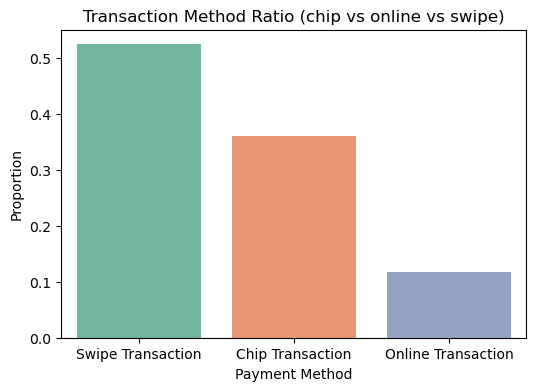

In [128]:
# 전체 거래 기준 각 거래 방식의 비율
method_ratio = work_with_target_pos.use_chip.value_counts(normalize=True)

# 비율 데이터프레임 변환
method_ratio_df = method_ratio.reset_index()
method_ratio_df.columns = ['method', 'ratio']

plt.figure(figsize=(6,4))
sns.barplot(
    x='method', 
    y='ratio', 
    data=method_ratio_df, 
    palette='Set2',  
    order=['Swipe Transaction', 'Chip Transaction', 'Online Transaction']  # 원하는 순서
)
plt.title('Transaction Method Ratio (chip vs online vs swipe)')
plt.xlabel('Payment Method')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

- count 기반으로 조사할 경우 결제방식의 절대적인 크기가 fraud 카운트에 영향을 미칠 수 있음
- 즉 사기 횟수도 결제 방식 사용량이 많은 순서로 나타날 수 있음
- 결제 방식 중 사기가 일어난 비율로 계산하는 것으로 해결

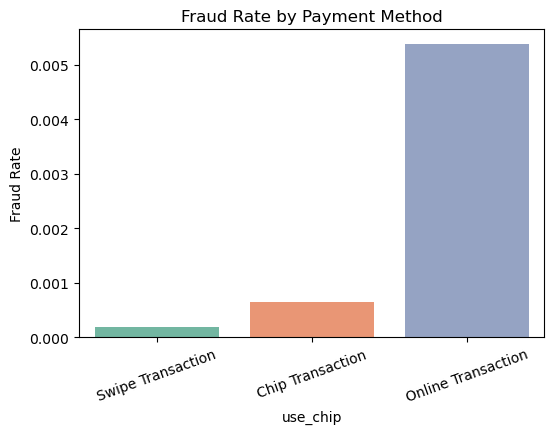

In [129]:
# 결제 방식별 fraud 비율 계산
fraud_ratio_by_payment = (
    work_with_target_pos
    .groupby('use_chip')['is_fraud']
    .mean()   # fraud 비율
    .reset_index()
)

# 원하는 순서
order = ['Swipe Transaction', 'Chip Transaction', 'Online Transaction']

plt.figure(figsize=(6,4))
sns.barplot(
    x='use_chip', 
    y='is_fraud', 
    data=fraud_ratio_by_payment, 
    order=order, 
    palette='Set2'
)
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Payment Method')
plt.xticks(rotation=20)
plt.show()

- 온라인 거래에서 fraud일 확률이 높다 = 온라인 거래를 선호하는 사람일수록 사기거래에 노출될 위험이 크다.
- 고객당 거래방식 비율 집계를 통해 선호하는 거래 방식을 파악한다.

In [275]:
# client_id 별 거래 방식 비율 집계
chip_ratios = (
    work_with_target_pos
    .groupby('client_id')['use_chip']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
).reset_index()

chip_ratios.columns.name = None  # 컬럼 레벨 이름 제거

# 컬럼명 변경
chip_ratios = chip_ratios.rename(
    columns={
        'Swipe Transaction': 'swipe_ratio',
        'Chip Transaction': 'chip_ratio',
        'Online Transaction': 'online_ratio'
    }
)

#### @@@@@@@@@@@@@@ 데이터 변형 시작점 @@@@@@@@@@@@@@@@@@@

In [342]:
# chip_ratios merge
users_prep = pd.merge(
    users_with_fraud_count_pos, # 기본 유저 전처리 데이터에 병합
    chip_ratios,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

In [343]:
users_prep.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_count,chip_ratio,online_ratio,swipe_ratio
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,127613,787,5,9,0.231560,0.074637,0.693802
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,191349,701,5,21,0.434114,0.072412,0.493474
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,196,698,5,30,0.190590,0.418456,0.390953
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,202328,722,4,8,0.429674,0.096417,0.473909
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,183855,675,1,0,0.389509,0.146743,0.463748


- 가장 선호하는 또는 가장 불호하는 거래방식 추가

In [344]:
# 각 row마다 가장 큰/작은 ratio 찾기
def get_most_least(row):
    ratios = {
        'Chip Transaction': row['chip_ratio'],
        'Online Transaction': row['online_ratio'],
        'Swipe Transaction': row['swipe_ratio']
    }
    most = max(ratios, key=ratios.get).split()[0]   # 'Chip', 'Online', 'Swipe'
    least = min(ratios, key=ratios.get).split()[0]
    return pd.Series([most, least])

# 가장 선호하는 / 싫어하는 결제방식 추가
users_prep[['most_prefer','least_prefer']] = users_prep.apply(get_most_least, axis=1)

In [345]:
users_prep.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_count,chip_ratio,online_ratio,swipe_ratio,most_prefer,least_prefer
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,127613,787,5,9,0.231560,0.074637,0.693802,Swipe,Online
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,191349,701,5,21,0.434114,0.072412,0.493474,Swipe,Online
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,196,698,5,30,0.190590,0.418456,0.390953,Online,Chip
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,202328,722,4,8,0.429674,0.096417,0.473909,Swipe,Online
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,183855,675,1,0,0.389509,0.146743,0.463748,Swipe,Online


### 2. 유저별 결제 금액 max/min/mean/median EDA 및 Feature Engineering

In [346]:
work_with_target_pos.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud,week,month
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,...,2022-07-01,1,2,55,2008-05-01,2008,0,0,2010-01-01,2010-01-01
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,...,2024-12-01,1,1,9100,2005-09-01,2015,0,0,2010-01-01,2010-01-01
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,...,2020-05-01,1,1,14802,2006-01-01,2008,0,0,2010-01-01,2010-01-01
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,...,2024-10-01,0,2,37634,2004-05-01,2006,0,0,2010-01-01,2010-01-01
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,...,2020-01-01,1,1,19113,2009-07-01,2014,0,0,2010-01-01,2010-01-01


- 유저별 카드 사용 기간이 모두 다를것이라 판단 (차후 확인)
- 금액의 최소값, 최대값, 카드사용횟수 등을 count로 사용하게 되면 왜곡 발생 가능
- 주별 평균 최소값, 주별 평균 최대값, 주별 평균 값, 주별 평균 중앙값, 주별 평균 사용횟수 형태로 정규화 필요하다고 판단.

In [ ]:
# 날짜 타입 변환
work_with_target_pos['date'] = pd.to_datetime(work_with_target_pos['date'])

# 월 단위 컬럼 추가
work_with_target_pos['month'] = work_with_target_pos['date'].dt.to_period('M').dt.start_time

# 1단계: 월 단위 집계
monthly_amount_stats = (
    work_with_target_pos
    .groupby(['client_id', work_with_target_pos['date'].dt.to_period('M').dt.start_time])['amount'] # 한달 단위로 묶어서 집계
    .agg(
        monthly_min_amount=lambda x: x[x > 0].min(), # min 값중 0 또는 음수는 제거 - 양수로 실제 구매가 이루어진 경우만 고려
        monthly_max_amount='max',
        monthly_mean_amount='mean',
        monthly_median_amount='median',
        monthly_count_amount='count'
    )
    .reset_index()
)

# 2단계: client_id별 월 평균 계산
monthly_avg_amount_stats = (
    monthly_amount_stats
    .groupby('client_id')[['monthly_min_amount','monthly_max_amount','monthly_mean_amount','monthly_median_amount','monthly_count_amount']]
    .mean()  # 한달 단위 값들의 평균을 구함
    .reset_index()
    .rename(columns=
            {'monthly_min_amount': 'monthly_avg_min_amount', 
             'monthly_max_amount': 'monthly_avg_max_amount',
             'monthly_mean_amount': 'monthly_avg_amount',
             'monthly_median_amount': 'monthly_avg_median_amount',
             'monthly_count_amount': 'monthly_avg_count_transaction',
    })
)

In [ ]:
monthly_avg_amount_stats

In [ ]:
# 2. client_id + month별 unique merchant_id 집계
monthly_merchant_counts = (
    work_with_target_pos
    .groupby(['client_id', 'month'])['merchant_id']
    .nunique()   # 한 달 동안 거래한 서로 다른 merchant_id 수
    .reset_index()
    .rename(columns={'merchant_id': 'num_unique_merchants'})
)

# 3. client_id별 월 평균 unique merchant 수 계산
monthly_unique_merchants_stats = (
    monthly_merchant_counts
    .groupby('client_id')['num_unique_merchants']
    .mean()
    .reset_index()
    .rename(columns={'num_unique_merchants': 'monthly_evg_unique_merchants'})
)

In [ ]:
monthly_merchant_counts

In [ ]:
monthly_unique_merchants_stats

- 실제 고객들의 카드 사용 기간이 다 재각각인가? 확인

In [ ]:
# client_id별로 사용한 고유 주(week) 수 계산
months_per_client = (
    work_with_target_pos
    .groupby('client_id')['month']
    .nunique()  # 고유 월 수
    .reset_index()
)

months_per_client.columns = ['client_id', 'num_months_used']
months_per_client['num_months_used'].value_counts().sort_index(ascending=True)

In [ ]:
# 514주 제외.
filtered_months = weeks_per_client[weeks_per_client['num_months_used'] != 118]

plt.figure(figsize=(8,4))
plt.hist(filtered_weeks['num_months_used'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Weeks Used')
plt.ylabel('Number of Clients')
plt.title('Distribution of Card Usage Weeks per Client (514 excluded)')
plt.show()

- 85주부터 514주까지 다양한 카드 사용 기간 존재 확인
- 주별로 정규화 해주는 것은 옳은 판단이라고 판단됨

In [ ]:
# monthly_avg_amount_stats merge
users_prep = pd.merge(
    users_prep,
    monthly_avg_amount_stats,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

# monthly_unique_merchants_stats merge
users_prep = pd.merge(
    users_prep,
    monthly_unique_merchants_stats,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

In [ ]:
users_prep.head()

In [ ]:
users_prep.head()

## 빈번 거래 탐지 - Jui

In [ ]:
tx = transactions[["client_id","date"]].copy()
tx["date"] = pd.to_datetime(tx["date"], errors="coerce")
tx = tx.dropna().sort_values(["client_id","date"])

# 고객별 직전 거래까지의 시간차(초)
tx["gap_sec"] = tx.groupby("client_id")["date"].diff().dt.total_seconds()

# 각 고객의 전체 거래 간격의 중앙값(초)
gap_sec_median = (
    tx
    .groupby('client_id')['gap_sec']
    .median()  # 고유 월 수
    .reset_index()
)

gap_sec_median

In [ ]:
# gap_sec_median merge
users_prep = pd.merge(
    users_prep,
    gap_sec_median,
    left_on='id',
    right_on='client_id',
    how='left'
).drop(columns=['client_id'])

In [ ]:
# # 시기거래 위험도 구분 label 설정 (3등분)
# users_prep['fraud_risk'] = pd.cut(
#     users_prep['fraud_count'],
#     bins=[-1, 5, 11, float('inf')],  # 경계값 설정 (-1로 시작해서 0 포함)
#     labels=['0', '1', '2']
# )

# 시기거래 위험도 구분 label 설정 (2등분)
users_prep['fraud_risk'] = pd.cut(
    users_prep['fraud_count'],
    bins=[-1, 10, float('inf')],  # 경계값 설정 (-1로 시작해서 0 포함)
    labels=['0', '1']
)

In [ ]:
users_prep.columns

In [320]:
users_prep.to_csv('users_prep.csv')

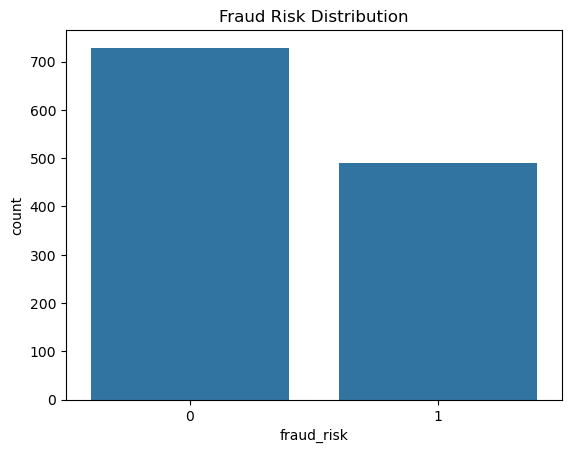

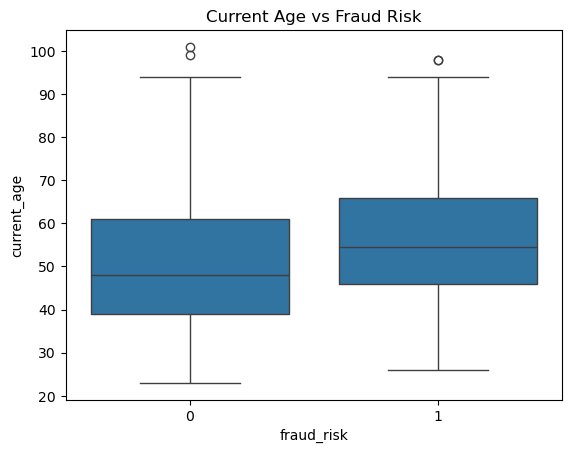

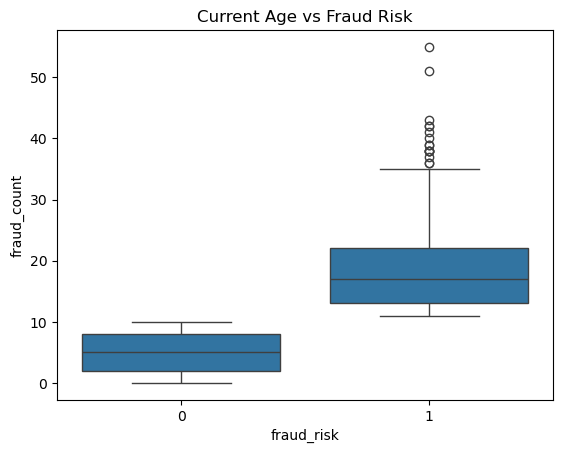

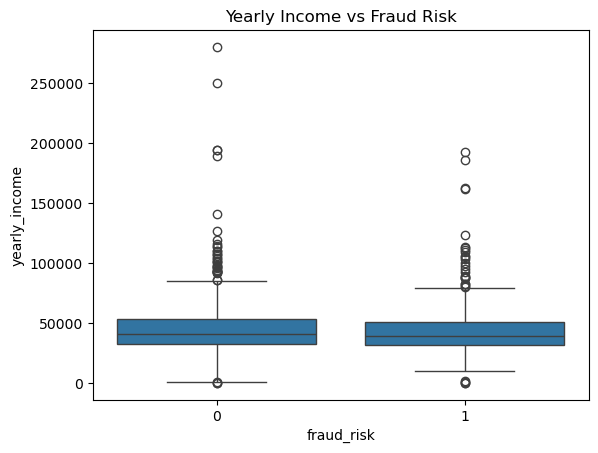

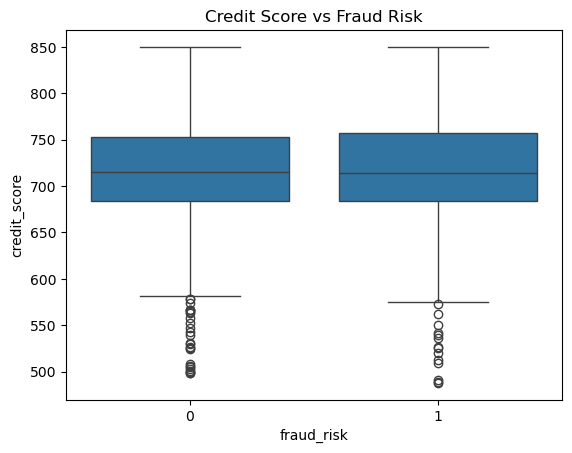

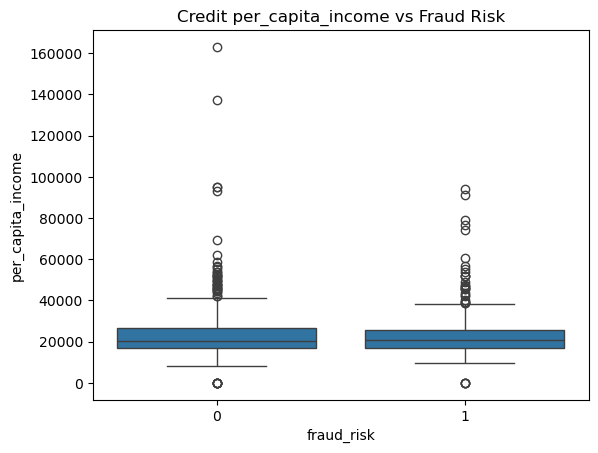

In [323]:
# 1. fraud_risk별 고객 수
sns.countplot(x='fraud_risk', data=users_prep)
plt.title('Fraud Risk Distribution')
plt.show()

# 2. 연령대(current_age) vs fraud_risk
sns.boxplot(x='fraud_risk', y='current_age', data=users_prep)
plt.title('Current Age vs Fraud Risk')
plt.show()

# 2. 연령대(current_age) vs fraud_risk
sns.boxplot(x='fraud_risk', y='fraud_count', data=users_prep)
plt.title('Current Age vs Fraud Risk')
plt.show()

# 3. yearly_income vs fraud_risk
sns.boxplot(x='fraud_risk', y='yearly_income', data=users_prep)
plt.title('Yearly Income vs Fraud Risk')
plt.show()

# 4. credit_score vs fraud_risk
sns.boxplot(x='fraud_risk', y='credit_score', data=users_prep)
plt.title('Credit Score vs Fraud Risk')
plt.show()

# 5. per_capita_income vs fraud_risk
sns.boxplot(x='fraud_risk', y='per_capita_income', data=users_prep)
plt.title('Credit per_capita_income vs Fraud Risk')
plt.show()

# 분류 모델 훈련

In [166]:
# fraud_risk가 null이 아닌 샘플만 선택
data = users_prep.dropna()

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 0 to 1997
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    1219 non-null   int64   
 1   current_age           1219 non-null   int64   
 2   retirement_age        1219 non-null   int64   
 3   birth_year            1219 non-null   int64   
 4   birth_month           1219 non-null   int64   
 5   gender                1219 non-null   object  
 6   latitude              1219 non-null   float64 
 7   longitude             1219 non-null   float64 
 8   per_capita_income     1219 non-null   int64   
 9   yearly_income         1219 non-null   int64   
 10  total_debt            1219 non-null   int64   
 11  credit_score          1219 non-null   int64   
 12  num_credit_cards      1219 non-null   int64   
 13  fraud_count           1219 non-null   Int8    
 14  chip_ratio            1219 non-null   float64 
 15  online_ra

In [168]:
data.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,...,online_ratio,swipe_ratio,most_prefer,least_prefer,weekly_min_amount,weekly_max_amount,weekly_mean_amount,weekly_median_amount,weekly_count_amount,fraud_risk
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,...,0.074637,0.693802,Swipe,Online,8.159708,290.178580,81.057181,71.547335,22.130350,1
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,...,0.072412,0.493474,Swipe,Online,12.066381,320.197198,79.726211,64.614815,10.881323,2
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,...,0.418456,0.390953,Online,Chip,1.363113,216.739319,33.045918,31.666401,50.365759,2
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,...,0.096417,0.473909,Swipe,Online,14.480117,757.631829,126.519642,61.903687,16.889105,1
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,...,0.146743,0.463748,Swipe,Online,11.852023,389.222588,96.090390,87.131060,17.951362,0


In [189]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 데이터 전처리

In [206]:
# 학습 데이터 (예시)
X = data.drop(columns=['id', 'fraud_count', 'fraud_risk', 'birth_month', 'longitude', 'latitude'])
y = data['fraud_risk']

In [214]:
X

,current_age,retirement_age,birth_year,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,chip_ratio,online_ratio,swipe_ratio,most_prefer,least_prefer,weekly_min_amount,weekly_max_amount,weekly_mean_amount,weekly_median_amount,weekly_count_amount
0,53,66,1966,Female,29278,59696,127613,787,5,0.231560,0.074637,0.693802,Swipe,Online,8.159708,290.178580,81.057181,71.547335,22.130350
1,53,68,1966,Female,37891,77254,191349,701,5,0.434114,0.072412,0.493474,Swipe,Online,12.066381,320.197198,79.726211,64.614815,10.881323
2,81,67,1938,Female,22681,33483,196,698,5,0.190590,0.418456,0.390953,Online,Chip,1.363113,216.739319,33.045918,31.666401,50.365759
3,63,63,1957,Female,163145,249925,202328,722,4,0.429674,0.096417,0.473909,Swipe,Online,14.480117,757.631829,126.519642,61.903687,16.889105
4,43,70,1976,Male,53797,109687,183855,675,1,0.389509,0.146743,0.463748,Swipe,Online,11.852023,389.222588,96.090390,87.131060,17.951362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,31,72,1988,Female,13194,26900,74083,758,2,0.908438,0.030101,0.061461,Chip,Online,6.627378,150.302809,15.993225,15.823071,29.737828
1993,85,66,1934,Female,19025,35270,1769,731,6,0.411307,0.083665,0.505028,Swipe,Online,10.293619,176.530292,45.547766,40.084776,10.254864
1995,32,70,1987,Male,23550,48010,87837,703,3,0.306986,0.031288,0.661726,Swipe,Online,1.013444,233.232140,23.130076,2.292130,22.447471
1996,62,65,1957,Female,24218,49378,104480,740,4,0.257192,0.105937,0.636871,Swipe,Online,5.275350,249.068307,39.990010,18.858191,20.219844


In [207]:
# 숫자형 / 범주형 컬럼 구분
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 전처리 컬럼 변환기
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

In [208]:
# 전체 파이프라인
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [209]:
# 전처리 적용
X_preprocessed = pipeline.fit_transform(X)

In [210]:
X_preprocessed.shape

(1219, 21)

In [211]:
# 문자열이면 숫자로 변환
y_numeric = y.astype(int)

# train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_numeric,
    test_size=0.2,
    random_state=42,
    stratify=y_numeric
)

## 모델 정의 및 훈련

In [212]:
# 사용할 분류기 정의
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(objective='multi:softmax', num_class=len(y.unique())),
    'LGBM': LGBMClassifier()
}

In [213]:
# 모델 학습 및 평가
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))


LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.48      0.44        79
           1       0.33      0.19      0.24        77
           2       0.49      0.58      0.53        88

    accuracy                           0.43       244
   macro avg       0.41      0.42      0.40       244
weighted avg       0.41      0.43      0.41       244


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.32      0.32        79
           1       0.36      0.26      0.30        77
           2       0.41      0.52      0.46        88

    accuracy                           0.37       244
   macro avg       0.37      0.37      0.36       244
weighted avg       0.37      0.37      0.37       244


GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.37      0.36        79
        

In [199]:
def plot_feature_importance(model, pipeline, top_n=20, title=None):
    """
    모델의 feature importance를 바차트로 시각화

    Parameters:
    - model: 학습된 모델 (RandomForest, XGBoost, LGBM 등)
    - pipeline: 전처리 pipeline 객체 (ColumnTransformer 포함)
    - top_n: 상위 n개 feature만 시각화
    - title: 그래프 제목 (없으면 모델 이름 사용)
    """
    # feature importance
    importances = model.feature_importances_
    feature_names = pipeline['preprocessor'].get_feature_names_out()
    
    # DataFrame 생성 및 정렬
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False)
    
    # 시각화
    plt.figure(figsize=(10,6))
    plt.barh(
        importance_df['feature'][:top_n][::-1],
        importance_df['importance'][:top_n][::-1]
    )
    plt.xlabel('Importance')
    plt.title(title if title else f'Top {top_n} Feature Importances - {type(model).__name__}')
    plt.show()
    
    return importance_df

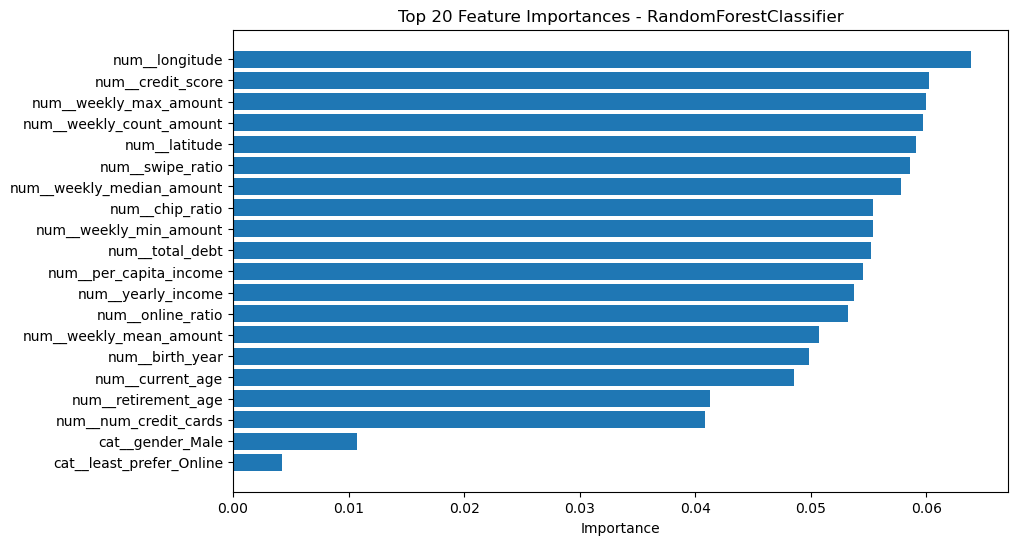

,feature,importance
4,num__longitude,0.063888
8,num__credit_score,0.060193
14,num__weekly_max_amount,0.059992
17,num__weekly_count_amount,0.059674
3,num__latitude,0.059148
12,num__swipe_ratio,0.058572
16,num__weekly_median_amount,0.057790
10,num__chip_ratio,0.055411
13,num__weekly_min_amount,0.055408
7,num__total_debt,0.055212


In [200]:
plot_feature_importance(classifiers['RandomForest'], pipeline)

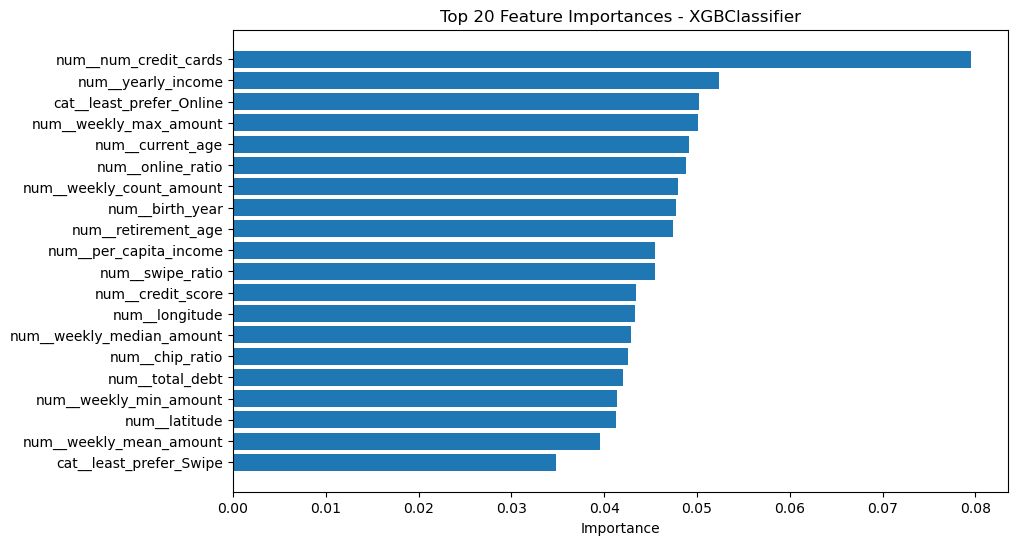

,feature,importance
9,num__num_credit_cards,0.079558
6,num__yearly_income,0.052343
21,cat__least_prefer_Online,0.050195
14,num__weekly_max_amount,0.050135
0,num__current_age,0.049167
11,num__online_ratio,0.048769
17,num__weekly_count_amount,0.047966
2,num__birth_year,0.047717
1,num__retirement_age,0.047390
5,num__per_capita_income,0.045500


In [201]:
plot_feature_importance(classifiers['XGBoost'], pipeline)

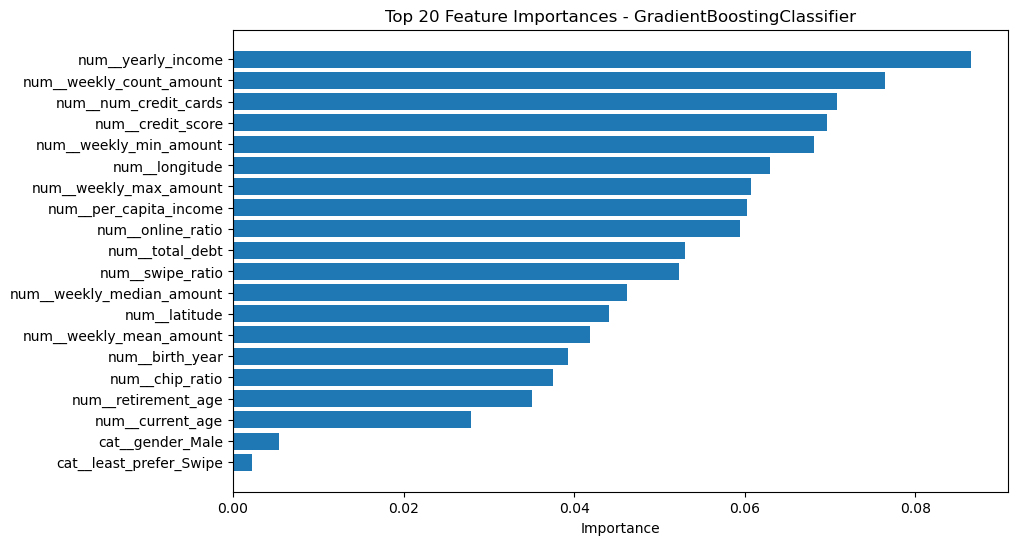

,feature,importance
6,num__yearly_income,0.086572
17,num__weekly_count_amount,0.076466
9,num__num_credit_cards,0.070828
8,num__credit_score,0.069698
13,num__weekly_min_amount,0.068108
4,num__longitude,0.062935
14,num__weekly_max_amount,0.060800
5,num__per_capita_income,0.060220
11,num__online_ratio,0.059407
7,num__total_debt,0.053052


In [204]:
plot_feature_importance(classifiers['GradientBoosting'], pipeline)

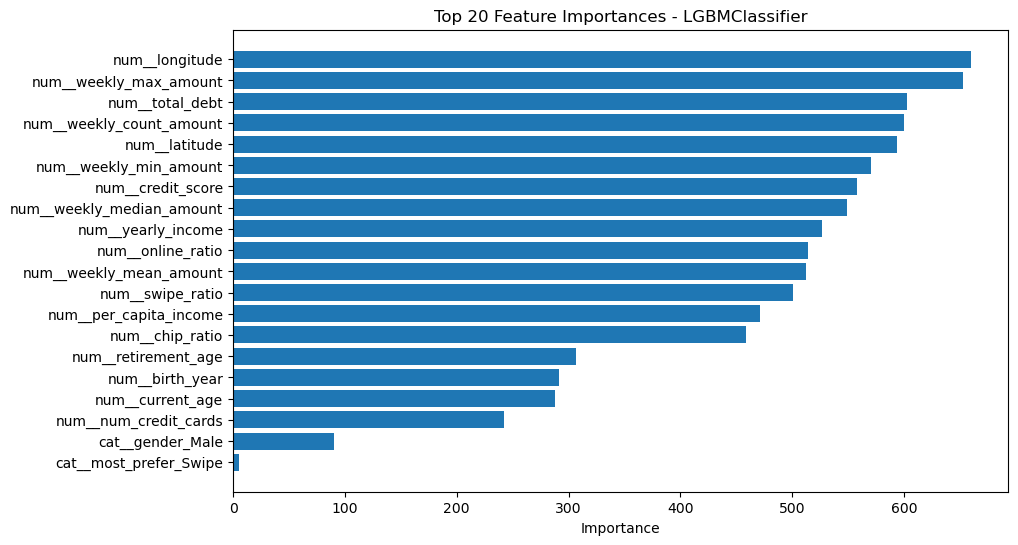

,feature,importance
4,num__longitude,660
14,num__weekly_max_amount,653
7,num__total_debt,603
17,num__weekly_count_amount,600
3,num__latitude,594
13,num__weekly_min_amount,570
8,num__credit_score,558
16,num__weekly_median_amount,549
6,num__yearly_income,527
11,num__online_ratio,514


In [205]:
(classifiers['LGBM'], pipeline)

In [222]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,hour,dow,amount_pos,amount_log1p,is_refund,amount_neg,zip_str
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,5499,0,4,0.00,0.000000,1,-77.0,58523
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,5311,0,4,14.57,2.745346,0,0.0,52722
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,4829,0,4,80.00,4.394449,0,0.0,92084
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,4829,0,4,200.00,5.303305,0,0.0,46307
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,5813,0,4,46.41,3.858833,0,0.0,20776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792,5499,23,3,1.11,0.746688,0,0.0,91792
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,<NA>,5815,23,3,12.80,2.624669,0,0.0,<NA>
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002,4900,23,3,40.44,3.724247,0,0.0,75002
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014,5411,23,3,4.00,1.609438,0,0.0,94014


In [224]:
work_with_target_pos

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud,week
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,...,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0,0,2009-12-28
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,...,Credit,2024-12-01,1,1,9100,2005-09-01,2015,0,0,2009-12-28
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,...,Debit,2020-05-01,1,1,14802,2006-01-01,2008,0,0,2009-12-28
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,...,Debit,2024-10-01,0,2,37634,2004-05-01,2006,0,0,2009-12-28
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,...,Debit,2020-01-01,1,1,19113,2009-07-01,2014,0,0,2009-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792,...,Debit,2020-02-01,1,1,26743,2019-03-01,2019,0,0,2019-10-28
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,0,0,...,Debit,2024-06-01,1,1,5141,2004-03-01,2012,0,0,2019-10-28
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002,...,Debit,2021-06-01,1,1,17686,2004-02-01,2007,0,0,2019-10-28
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014,...,Debit,2021-11-01,1,2,14036,2005-11-01,2010,0,0,2019-10-28


In [225]:
# 1. 날짜 확인 & datetime 변환
work_with_target_pos['date'] = pd.to_datetime(work_with_target_pos['date'])

# 2. 월 단위 컬럼 추가 (연-월)
work_with_target_pos['month'] = work_with_target_pos['date'].dt.to_period('M').dt.start_time

# 3. client_id + month별 서로 다른 merchant_id 개수 집계
monthly_unique_merchants = (
    work_with_target_pos
    .groupby(['client_id', 'month'])['merchant_id']
    .nunique()
    .reset_index()
    .rename(columns={'merchant_id': 'num_unique_merchants'})
)

# 4. client_id별 월 수 계산
months_per_client = (
    monthly_unique_merchants
    .groupby('client_id')['month']
    .nunique()
    .reset_index()
    .rename(columns={'month': 'num_months'})
)

# 5. client_id별 전체 unique merchant 합계
total_merchants_per_client = (
    monthly_unique_merchants
    .groupby('client_id')['num_unique_merchants']
    .sum()
    .reset_index()
    .rename(columns={'num_unique_merchants': 'total_unique_merchants'})
)

# 4. 합쳐서 월 평균 unique merchant 계산
monthly_avg_merchants = pd.merge(total_merchants_per_client, months_per_client, on='client_id')
monthly_avg_merchants['avg_unique_merchants_per_month'] = (
    monthly_avg_merchants['total_unique_merchants'] / monthly_avg_merchants['num_months']
)

monthly_avg_merchants.head()

,client_id,month,num_unique_merchants
0,0,2010-01-01,39
1,0,2010-02-01,37
2,0,2010-03-01,38
3,0,2010-04-01,33
4,0,2010-05-01,32
